In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import math

In [2]:
df=pd.read_csv(r"C:\Users\user\Desktop\ML\Task1 Measures of central tendency_measures of spread\house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [5]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [6]:
df.tail()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13195,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689
13196,other,4 BHK,3600.0,5.0,400.0,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4,10407
13199,Doddathoguru,1 BHK,550.0,1.0,17.0,1,3090


In [7]:
df.drop(columns='size',inplace=True)
df

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615
2,Uttarahalli,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245
4,Kothanur,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...
13195,Whitefield,3453.0,4.0,231.00,5,6689
13196,other,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4689.0,4.0,488.00,4,10407


 MEAN

In [8]:
mean=df["price_per_sqft"].mean()
print("Mean=",mean)

Mean= 7920.336742424242


In [9]:
df["price_per_sqft"].describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

# Percentile

In [10]:
P1,P2,P3=df.price_per_sqft.quantile([0.25,0.50,0.75]) 
print("25 percentile =",P1)
print("50 percentile=",P2)
print("75 percentile=",P3)

25 percentile = 4267.0
50 percentile= 5438.0
75 percentile= 7317.0


# IQR(Inter quartile range method)

In [11]:
IQR=P3-P1
print("IQR=",IQR)

IQR= 3050.0


In [13]:
lower_whisker=P1-1.5*IQR
upper_whisker=P3+1.5*IQR 
print("Lower whisker =",lower_whisker,"Upper whisker =",upper_whisker)

Lower whisker = -308.0 Upper whisker = 11892.0


In [14]:
df[(df["price_per_sqft"]<lower_whisker)|(df["price_per_sqft"]>upper_whisker)]

,location,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,3300.0,4.0,600.0,4,18181
9,other,1020.0,6.0,370.0,6,36274
22,Thanisandra,2800.0,5.0,380.0,4,13571
45,HSR Layout,600.0,9.0,200.0,8,33333
48,KR Puram,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...
13142,other,1140.0,1.0,185.0,2,16228
13157,other,1400.0,7.0,218.0,7,15571
13185,Hulimavu,500.0,1.0,220.0,1,44000
13186,other,1200.0,5.0,325.0,4,27083


# Normal distribution

In [15]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [16]:
df["price_per_sqft"].describe().round(2)

count       13200.00
mean         7920.34
std        106727.16
min           267.00
25%          4267.00
50%          5438.00
75%          7317.00
max      12000000.00
Name: price_per_sqft, dtype: float64

In [17]:
skewness=df["price_per_sqft"].skew()
kurt=df["price_per_sqft"].kurtosis()
print("skewness:",skewness)
print("kurtosis:",kurt)

skewness: 108.28105529705168
kurtosis: 12095.21502832288


In [42]:
df["log_of_price_per_sqft"]=np.log(df["price_per_sqft"])
log_skew=df["log_of_price_per_sqft"].skew()
print("log skewness:",log_skew)
log_kurt=df["log_of_price_per_sqft"].kurtosis()
print("log kurtosis",log_kurt)

log skewness: 1.3998626551353
log kurtosis 9.203576429862675


C:\Users\user\AppData\Local\Temp\ipykernel_5640\3857998752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["log_of_price_per_sqft"],color='b')


<Axes: xlabel='log_of_price_per_sqft', ylabel='Density'>

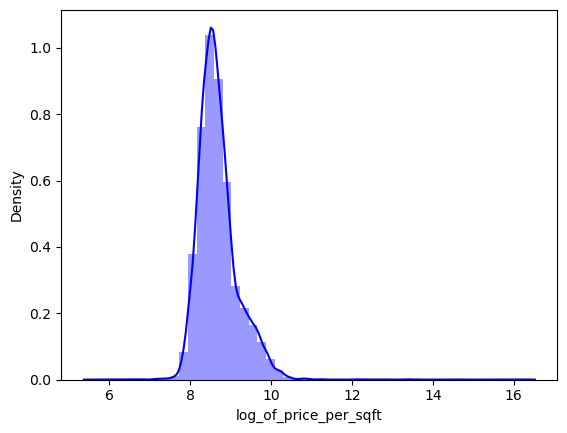

In [19]:
sns.distplot(df["log_of_price_per_sqft"],color='b')

# skewness kurtosis

In [43]:
df["log_of_price_per_sqft"]=np.log(df["log_of_price_per_sqft"])
skewness=df["log_of_price_per_sqft"].skew()
print("skewness:",skewness)
kurt1=df["log_of_price_per_sqft"].kurtosis()
print("kurtosis:",kurt1)

skewness: 0.8539637175786333
kurtosis: 4.307571719567429


<Axes: xlabel='log_of_price_per_sqft', ylabel='Count'>

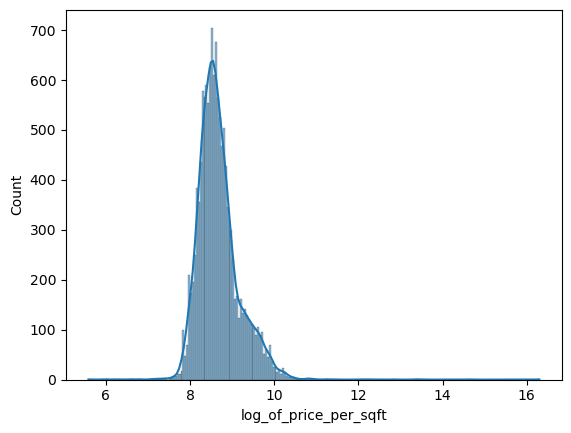

In [26]:
sns.histplot(data=df,x=df["log_of_price_per_sqft"],kde=True)

# Z-Score

In [44]:
mean1=df["log_of_price_per_sqft"].mean()
print("mean:",mean1)
stddev=df["log_of_price_per_sqft"].std()
print("standard deviation",stddev)

mean: 2.159389606765937
standard deviation 0.054912121865772545


In [49]:
df["zscore"]=(df["log_of_price_per_sqft"]-mean)/stddev
df

,location,total_sqft,bath,price,bhk,price_per_sqft,log_of_price_per_sqft,zscore,log_price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699,2.106061,NaN,NaN
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615,2.132635,NaN,NaN
2,Uttarahalli,1440.0,2.0,62.00,3,4305,2.124359,NaN,NaN
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245,2.167857,NaN,NaN
4,Kothanur,1200.0,2.0,51.00,2,4250,2.122821,NaN,NaN
...,...,...,...,...,...,...,...,...,...
13195,Whitefield,3453.0,4.0,231.00,5,6689,2.175685,NaN,NaN
13196,other,3600.0,5.0,400.00,4,11111,2.231700,NaN,NaN
13197,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258,2.147977,NaN,NaN
13198,Padmanabhanagar,4689.0,4.0,488.00,4,10407,2.224649,NaN,NaN


In [50]:
df1=df[(df.zscore>-3)&(df.zscore<3)]
df1

,location,total_sqft,bath,price,bhk,price_per_sqft,log_of_price_per_sqft,zscore,log_price_per_sqft


# Box plot

Text(0.5, 1.0, 'Total_sqft')

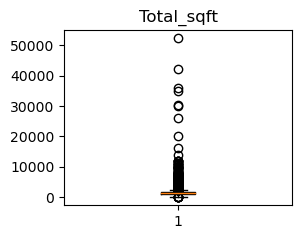

In [51]:
plt.figure(figsize=(10,5))
plt.subplot(2, 3, 1)
plt.boxplot(df.total_sqft)
plt.title("Total_sqft")

Text(0.5, 1.0, 'Price_per_sqft')

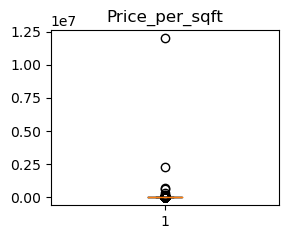

In [52]:
plt.figure(figsize=(10,5))
plt.subplot(2,3,2)
plt.boxplot(df.price_per_sqft)
plt.title("Price_per_sqft")

Text(0.5, 1.0, 'Bath')

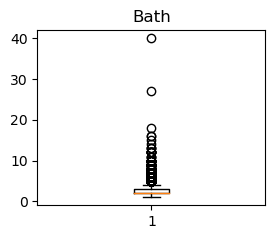

In [53]:
plt.figure(figsize=(10,5))
plt.subplot(2,3,3)
plt.boxplot(df.bath)
plt.title("Bath")

Text(0.5, 1.0, 'BHK')

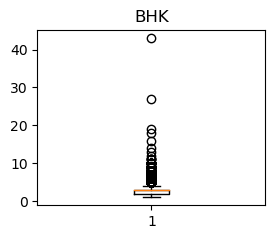

In [54]:
plt.figure(figsize=(10,5))
plt.subplot(2,3,4)
plt.boxplot(df.bhk)
plt.title("BHK")

Text(0.5, 1.0, 'Price')

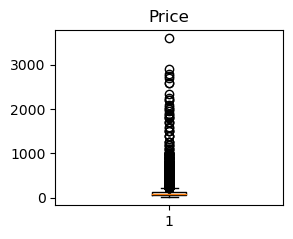

In [55]:
plt.figure(figsize=(10,5))
plt.subplot(2,3,5)
plt.boxplot(df.price)
plt.title("Price")

# Heatmap

In [56]:
df3=df.drop(["location","log_of_price_per_sqft","zscore"],axis=1)
df3

,total_sqft,bath,price,bhk,price_per_sqft,log_price_per_sqft
0,1056.0,2.0,39.07,2,3699,NaN
1,2600.0,5.0,120.00,4,4615,NaN
2,1440.0,2.0,62.00,3,4305,NaN
3,1521.0,3.0,95.00,3,6245,NaN
4,1200.0,2.0,51.00,2,4250,NaN
...,...,...,...,...,...,...
13195,3453.0,4.0,231.00,5,6689,NaN
13196,3600.0,5.0,400.00,4,11111,NaN
13197,1141.0,2.0,60.00,2,5258,NaN
13198,4689.0,4.0,488.00,4,10407,NaN


In [64]:
correl=df3.corr()
correl

,total_sqft,bath,price,bhk,price_per_sqft,log_price_per_sqft
total_sqft,1.000000,0.392743,0.574330,0.346013,-0.008267,NaN
bath,0.392743,1.000000,0.455998,0.897951,0.030883,NaN
price,0.574330,0.455998,1.000000,0.396883,0.028387,NaN
bhk,0.346013,0.897951,0.396883,1.000000,0.030955,NaN
price_per_sqft,-0.008267,0.030883,0.028387,0.030955,1.000000,NaN
log_price_per_sqft,NaN,NaN,NaN,NaN,NaN,NaN


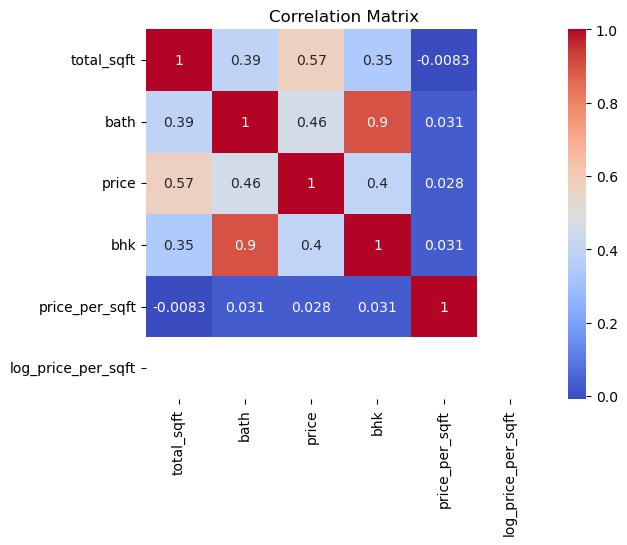

In [72]:
sns.heatmap(correl,annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Pair Plot

In [ ]:
sns.pairplot(df3)
plt.show()
plt.show()